# Bank Marketing Dataset

## Introduction

## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

## Load and Review Data

In [4]:
df_bank = pd.read_csv('E:\Cool Yeah\Hacktiv8\\Bank\Data\\bank-additional-full.csv', delimiter=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df_bank.shape

(41188, 21)

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Data Cleanup

In [5]:
clean_df = df_bank.drop(['campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [9]:
clean_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'y'],
      dtype='object')

In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  y            41188 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.8+ MB


In [12]:
clean_df.isnull().values.sum()

0

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
clean_df.job = le.fit_transform(clean_df.job)
clean_df.marital = le.fit_transform(clean_df.marital)
clean_df.education = le.fit_transform(clean_df.education)
clean_df.default = le.fit_transform(clean_df.default)
clean_df.housing = le.fit_transform(clean_df.housing)
clean_df.loan = le.fit_transform(clean_df.loan)
clean_df.contact = le.fit_transform(clean_df.contact)
clean_df.month = le.fit_transform(clean_df.month)
clean_df.day_of_week = le.fit_transform(clean_df.day_of_week)
clean_df.y = le.fit_transform(clean_df.y)


In [15]:
clean_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,y
0,56,3,1,0,0,0,0,1,6,1,261,0
1,57,7,1,3,1,0,0,1,6,1,149,0
2,37,7,1,3,0,2,0,1,6,1,226,0
3,40,0,1,1,0,0,0,1,6,1,151,0
4,56,7,1,3,0,0,2,1,6,1,307,0


In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          41188 non-null  int64
 1   job          41188 non-null  int32
 2   marital      41188 non-null  int32
 3   education    41188 non-null  int32
 4   default      41188 non-null  int32
 5   housing      41188 non-null  int32
 6   loan         41188 non-null  int32
 7   contact      41188 non-null  int32
 8   month        41188 non-null  int32
 9   day_of_week  41188 non-null  int32
 10  duration     41188 non-null  int64
 11  y            41188 non-null  int32
dtypes: int32(10), int64(2)
memory usage: 2.2 MB


## Training Model

In [8]:
x = np.array(clean_df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration']])

In [9]:
x

array([[ 56,   3,   1, ...,   6,   1, 261],
       [ 57,   7,   1, ...,   6,   1, 149],
       [ 37,   7,   1, ...,   6,   1, 226],
       ...,
       [ 56,   5,   1, ...,   7,   0, 189],
       [ 44,   9,   1, ...,   7,   0, 442],
       [ 74,   5,   1, ...,   7,   0, 239]], dtype=int64)

In [10]:
y = np.array(clean_df['y'])

In [20]:
y

array([0, 0, 0, ..., 0, 1, 0])

### Split Data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
print("Jumlah Original Berlangganan Deposit : ", len(y[y == 1]))
print("Jumlah Original Tidak Berlangganan Deposit : ", len(y[y == 0]))

print("Training True : ", len(y_train[y_train == 1]))
print("Training False : ", len(y_train[y_train == 0]))

print("Testing True : ", len(y_test[y_test == 1]))
print("Testing False : ", len(y_test[y_test == 0]))

Jumlah Original Berlangganan Deposit :  4640
Jumlah Original Tidak Berlangganan Deposit :  36548
Training True :  3721
Training False :  29229
Testing True :  919
Testing False :  7319


### Create a Model and Train It

#### Logistic Regression

In [24]:
lr_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
lr_model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [25]:
lr_pred = lr_model.predict(x_test)

In [26]:
lr_model.score(x_train, y_train)

0.8930197268588771

In [27]:
lr_model.score(x_test, y_test)

0.8983976693372178

In [29]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_pred)))
print(metrics.confusion_matrix(y_test, lr_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_pred))
print(metrics.recall_score(y_test, lr_pred))

Accuracy: 0.8984
[[7213  106]
 [ 731  188]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7319
           1       0.64      0.20      0.31       919

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

0.2045701849836779


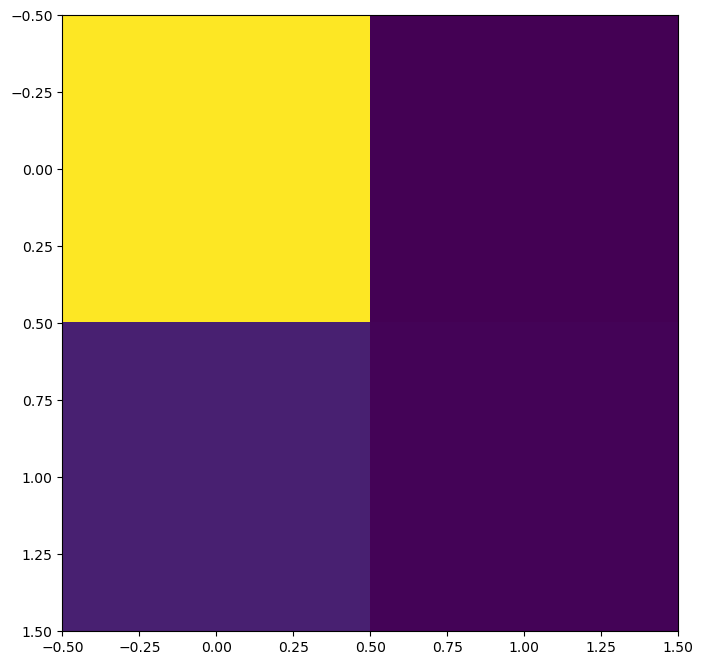

In [31]:
cm = metrics.confusion_matrix(y_test, lr_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
plt.show()

#### K-Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

D:\Application\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Application\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Text(0, 0.5, 'Error mean')

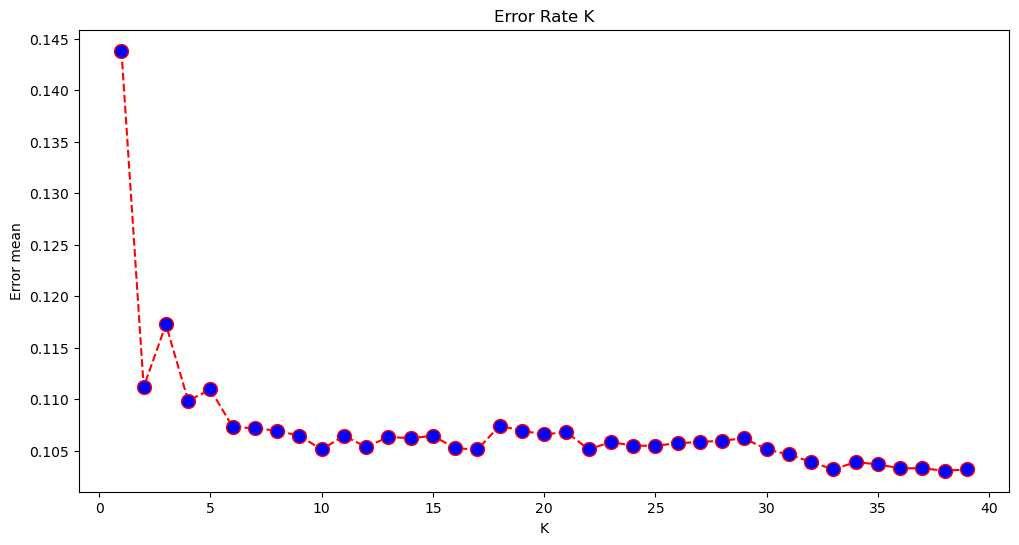

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color="red", linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)

D:\Application\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, knn_pred)))
print(metrics.confusion_matrix(y_test, knn_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, knn_pred))

Accuracy: 0.8968
[[7188  131]
 [ 719  200]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7319
           1       0.60      0.22      0.32       919

    accuracy                           0.90      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



#### Support Vector Machine

In [45]:
from sklearn import svm

In [46]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

In [161]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, svm_pred)))
print(metrics.confusion_matrix(y_test, svm_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, svm_pred))

Accuracy: 0.8884
[[7319    0]
 [ 919    0]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7319
           1       0.00      0.00      0.00       919

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.84      8238



D:\Application\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Application\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Application\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

In [13]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, dt_pred)))
print(metrics.confusion_matrix(y_test, dt_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, dt_pred))
print(metrics.recall_score(y_test, dt_pred))

Accuracy: 0.8695
[[6753  566]
 [ 509  410]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7319
           1       0.42      0.45      0.43       919

    accuracy                           0.87      8238
   macro avg       0.67      0.68      0.68      8238
weighted avg       0.87      0.87      0.87      8238

0.44613710554951036


#### Random Forest

In [14]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(x_train, y_train.ravel())
rf_pred = rf_model.predict(x_test)

In [15]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_pred)))
print(metrics.confusion_matrix(y_test, rf_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_pred))
print(metrics.recall_score(y_test, rf_pred))

Accuracy: 0.8991
[[7104  215]
 [ 616  303]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7319
           1       0.58      0.33      0.42       919

    accuracy                           0.90      8238
   macro avg       0.75      0.65      0.68      8238
weighted avg       0.88      0.90      0.89      8238

0.3297062023939064


#### Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

In [18]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, gnb_pred)))
print(metrics.confusion_matrix(y_test, gnb_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, gnb_pred))
print(metrics.recall_score(y_test, gnb_pred))

Accuracy: 0.8997
[[7071  248]
 [ 578  341]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7319
           1       0.58      0.37      0.45       919

    accuracy                           0.90      8238
   macro avg       0.75      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238

0.3710554951033732


## Peningkatan Peforma

1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.789 occured at C=0.100
1st max value of 0.790 occured at C=1.800
1st max value of 0.790 occured at C=1.800
1st max value of 0.790 occured at C=1.800
1st max value of 0.790 occured at C=1.800
1st max value of 0.790 occured at C=1.800
1st max value of 0.790 occured at C=1.800
1st max value of 0.790 occured at 

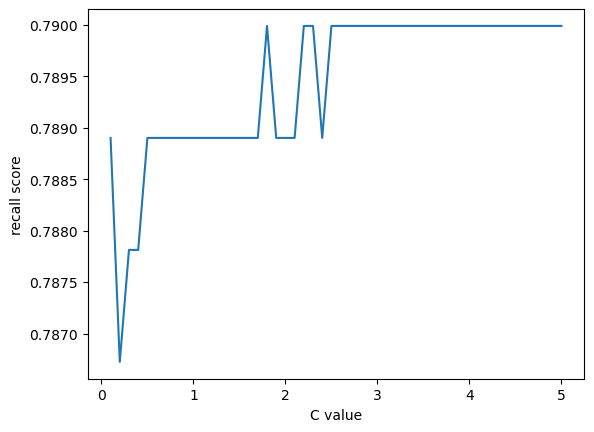

In [19]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

    best_score_C_val = C_values[recall_scores.index(best_recall_score)]
    print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val))

    %matplotlib inline
    plt.plot(C_values, recall_scores, "-")
    plt.xlabel("C value")
    plt.ylabel("recall score")

In [20]:
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.8018
[[5879 1440]
 [ 193  726]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7319
           1       0.34      0.79      0.47       919

    accuracy                           0.80      8238
   macro avg       0.65      0.80      0.67      8238
weighted avg       0.90      0.80      0.83      8238

0.7899891186071817
